# **Imports**

In [1]:
# import the dependencies
import tensorflow as tf
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
import os                
import cv2                                                                                             
import gc
from google.colab import drive
gc.enable()
 
print(tf.__version__)

2.3.0


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


**Download Data**

In [ ]:
# # you do not need to run this cell if you have an access to google drive.
# # download the dataset.
# !wget http://www.mediafire.com/file/83akhrn9n7ynj0f/orl_dataset.zip
# # unzip the dataset to google drive.
# !unzip orl_dataset.zip -d /content/drive/My\ Drive/College/Data_Mining_Assignments/Face_Recognition/data

# **2. Generate the Data Matrix and the Label vector**

In [3]:
filname = '../content/drive/My Drive/College/Data_Mining_Assignments/Face_Recognition/data/' #Arsany
# filname = '../content/drive/My Drive/Data_Mining_Assignments/Face_Recognition/data/' #Yomna

In [4]:
def list_files(dir):                                                                                                  
    r = []                                                                                                            
    subdirs = [x[0] for x in os.walk(dir)]                                                                            
    for subdir in subdirs:                                                                                            
        files = os.walk(subdir).__next__()[2]                                                                             
        if (len(files) > 0):                                                                                          
            for file in files:                                                                                        
                r.append(np.reshape(np.resize(cv2.imread(os.path.join(subdir, file)),(92,112)),(10304)))                                                                         
    return r
  


In [5]:
#data matrix
x = list_files(filname)
X_array = np.asarray(x)
print(X_array.shape)

(400, 10304)


# **3. Split the Dataset into Training and Test sets**

In [6]:
# split the data
train_set = []
test_set = []
train_label = []
test_label = []
train7_set = []
test3_set = []
train7_label = []
test3_label = []
for i in range(400):
  if i % 2 == 0:
    test_set.append(X_array[i])
    test_label.append(np.floor(i/10) + 1.)
  else:
    train_set.append(X_array[i])
    train_label.append(np.floor(i/10) + 1.)
  # another split ratio of data
  if i % 10 in range(0,3):
    test3_set.append(X_array[i])
    test3_label.append(np.floor(i/10) + 1.)
  else:
    train7_set.append(X_array[i])
    train7_label.append(np.floor(i/10) + 1.)

train_set_array = np.asarray(train_set)
test_set_array = np.asarray(test_set)
train_label_array = np.asarray(train_label)
test_label_array = np.asarray(test_label)

print("\nTrain set\n",train_set_array)
print("\nTrain set shape\n",train_set_array.shape)
print("\nTest set\n",test_set_array)
print("\nTest set shape\n",test_set_array.shape)

print("\n train label\n",train_label_array)
print("\n train label\n",train_label_array.shape)
print("\n test label\n",test_label_array)
print("\n test label\n",test_label_array.shape)


train7_set_array = np.asarray(train7_set)
test3_set_array = np.asarray(test3_set)
train7_label_array = np.asarray(train7_label)
test3_label_array = np.asarray(test3_label)

print("\nTrain7 set\n",train7_set_array)
print("\nTrain7 set shape\n",train7_set_array.shape)
print("\nTest3 set\n",test3_set_array)
print("\nTest3 set shape\n",test3_set_array.shape)

print("\n train7 label\n",train7_label_array)
print("\n train7 label\n",train7_label_array.shape)
print("\n test3 label\n",test3_label_array)
print("\n test3 label\n",test3_label_array.shape)


Train set
 [[ 69  69  69 ... 141 150 150]
 [ 46  46  46 ...  60  52  52]
 [ 41  41  41 ... 101  95  95]
 ...
 [ 45  45  45 ... 192 187 187]
 [ 47  47  47 ... 176 145 145]
 [116 116 116 ... 177 176 176]]

Train set shape
 (200, 10304)

Test set
 [[ 72  72  72 ... 110 114 114]
 [ 63  63  63 ... 175 173 173]
 [ 61  61  61 ... 144 145 145]
 ...
 [ 55  55  55 ...  79  77  77]
 [121 121 121 ... 144 134 134]
 [121 121 121 ... 186 186 186]]

Test set shape
 (200, 10304)

 train label
 [ 1.  1.  1.  1.  1.  2.  2.  2.  2.  2.  3.  3.  3.  3.  3.  4.  4.  4.
  4.  4.  5.  5.  5.  5.  5.  6.  6.  6.  6.  6.  7.  7.  7.  7.  7.  8.
  8.  8.  8.  8.  9.  9.  9.  9.  9. 10. 10. 10. 10. 10. 11. 11. 11. 11.
 11. 12. 12. 12. 12. 12. 13. 13. 13. 13. 13. 14. 14. 14. 14. 14. 15. 15.
 15. 15. 15. 16. 16. 16. 16. 16. 17. 17. 17. 17. 17. 18. 18. 18. 18. 18.
 19. 19. 19. 19. 19. 20. 20. 20. 20. 20. 21. 21. 21. 21. 21. 22. 22. 22.
 22. 22. 23. 23. 23. 23. 23. 24. 24. 24. 24. 24. 25. 25. 25. 25. 25. 26.
 26. 2

In [ ]:
# # split the label vector
# train_y = []
# test_y = []
# for i in range(40):
#   if i % 2 == 0:
#     test_y.append(y[i])
#   else:
#     train_y.append(y[i])

# train_y_vector= np.asarray(train_y)
# test_y_vector = np.asarray(test_y)

# print("\nTrain y vector\n",train_y_vector)
# print("\nTrain y vector shape\n",train_y_vector.shape)
# print("\nTest y vector\n",test_y_vector)
# print("\nTest y vector shape\n",test_y_vector.shape)

# **4. Classification using PCA.**

In [7]:
# PCA algorithm
def PCA(D, alpha):
  # Compute the mean vector (10304x1)
  mu = np.mean(D, axis = 0).reshape(10304,1)
  print("\n the mean is:\n", mu)

  # center the data
  z = D - mu.T
  print("\n the centered data is:\n",z)

  # compute COV matrix
  COV = np.dot(z.T, z) / D.shape[0]
  print("\n the covariance matrix is:\n",COV)

  # find eigenvalues and eigenvectors
  values, vectors = np.linalg.eigh(COV)
  sorted_eig  = np.argsort(-values)
  values = values[sorted_eig]
  # values = np.diag(values)
  vectors = vectors[:, sorted_eig]
  print("\n the eigenvalues are:\n", values)
  print("\n the eigenvectors are:\n", vectors)

  # fraction of total variance
  tot = np.sum(values)
  var_exp = [(i / tot) for i in (values)]
  # var_exp = np.diag(var_exp)
  print("\n the fraction of total variances:\n", var_exp)

  # calculate the cumulative sum
  fr = np.cumsum(var_exp)
  print("\n the cumulative sum:\n",fr)

  # choose dimentionality
  index = 0
  for i in range(len(fr)):
    if fr[i] >= alpha:
      # smallest r so that f(r) >= alpha
      item_value = fr[i]
      index = i
      break
  print("\n item is:\n",item_value)
  print("\n we take till index: \n", index)

  # Compute projection matrix U
  U = vectors[:, :index]
  print("\n the projection matrix is:\n",U)

  return U

In [8]:
U1 = PCA(train7_set_array, 0.8)


 the mean is:
 [[ 85.65357143]
 [ 85.65357143]
 [ 85.65357143]
 ...
 [160.15357143]
 [160.14642857]
 [160.14642857]]

 the centered data is:
 [[ -39.65357143  -39.65357143  -39.65357143 ... -100.15357143
  -108.14642857 -108.14642857]
 [ -24.65357143  -24.65357143  -24.65357143 ...  -16.15357143
   -15.14642857  -15.14642857]
 [ -44.65357143  -44.65357143  -44.65357143 ...  -59.15357143
   -65.14642857  -65.14642857]
 ...
 [ -38.65357143  -38.65357143  -38.65357143 ...   15.84642857
   -15.14642857  -15.14642857]
 [  35.34642857   35.34642857   35.34642857 ...   25.84642857
    25.85357143   25.85357143]
 [  30.34642857   30.34642857   30.34642857 ...   16.84642857
    15.85357143   15.85357143]]

 the covariance matrix is:
 [[1292.08355867 1292.08355867 1292.08355867 ...  550.38891582
   565.46144133  565.46144133]
 [1292.08355867 1292.08355867 1292.08355867 ...  550.38891582
   565.46144133  565.46144133]
 [1292.08355867 1292.08355867 1292.08355867 ...  550.38891582
   565.46144133 

In [9]:
U1.shape

(10304, 7)

In [10]:
U2 = PCA(train7_set_array, 0.85)


 the mean is:
 [[ 85.65357143]
 [ 85.65357143]
 [ 85.65357143]
 ...
 [160.15357143]
 [160.14642857]
 [160.14642857]]

 the centered data is:
 [[ -39.65357143  -39.65357143  -39.65357143 ... -100.15357143
  -108.14642857 -108.14642857]
 [ -24.65357143  -24.65357143  -24.65357143 ...  -16.15357143
   -15.14642857  -15.14642857]
 [ -44.65357143  -44.65357143  -44.65357143 ...  -59.15357143
   -65.14642857  -65.14642857]
 ...
 [ -38.65357143  -38.65357143  -38.65357143 ...   15.84642857
   -15.14642857  -15.14642857]
 [  35.34642857   35.34642857   35.34642857 ...   25.84642857
    25.85357143   25.85357143]
 [  30.34642857   30.34642857   30.34642857 ...   16.84642857
    15.85357143   15.85357143]]

 the covariance matrix is:
 [[1292.08355867 1292.08355867 1292.08355867 ...  550.38891582
   565.46144133  565.46144133]
 [1292.08355867 1292.08355867 1292.08355867 ...  550.38891582
   565.46144133  565.46144133]
 [1292.08355867 1292.08355867 1292.08355867 ...  550.38891582
   565.46144133 

In [11]:
U2.shape

(10304, 11)

In [12]:
U3 = PCA(train7_set_array, 0.9)


 the mean is:
 [[ 85.65357143]
 [ 85.65357143]
 [ 85.65357143]
 ...
 [160.15357143]
 [160.14642857]
 [160.14642857]]

 the centered data is:
 [[ -39.65357143  -39.65357143  -39.65357143 ... -100.15357143
  -108.14642857 -108.14642857]
 [ -24.65357143  -24.65357143  -24.65357143 ...  -16.15357143
   -15.14642857  -15.14642857]
 [ -44.65357143  -44.65357143  -44.65357143 ...  -59.15357143
   -65.14642857  -65.14642857]
 ...
 [ -38.65357143  -38.65357143  -38.65357143 ...   15.84642857
   -15.14642857  -15.14642857]
 [  35.34642857   35.34642857   35.34642857 ...   25.84642857
    25.85357143   25.85357143]
 [  30.34642857   30.34642857   30.34642857 ...   16.84642857
    15.85357143   15.85357143]]

 the covariance matrix is:
 [[1292.08355867 1292.08355867 1292.08355867 ...  550.38891582
   565.46144133  565.46144133]
 [1292.08355867 1292.08355867 1292.08355867 ...  550.38891582
   565.46144133  565.46144133]
 [1292.08355867 1292.08355867 1292.08355867 ...  550.38891582
   565.46144133 

In [13]:
U3.shape

(10304, 20)

In [14]:
U4 = PCA(train7_set_array, 0.95)


 the mean is:
 [[ 85.65357143]
 [ 85.65357143]
 [ 85.65357143]
 ...
 [160.15357143]
 [160.14642857]
 [160.14642857]]

 the centered data is:
 [[ -39.65357143  -39.65357143  -39.65357143 ... -100.15357143
  -108.14642857 -108.14642857]
 [ -24.65357143  -24.65357143  -24.65357143 ...  -16.15357143
   -15.14642857  -15.14642857]
 [ -44.65357143  -44.65357143  -44.65357143 ...  -59.15357143
   -65.14642857  -65.14642857]
 ...
 [ -38.65357143  -38.65357143  -38.65357143 ...   15.84642857
   -15.14642857  -15.14642857]
 [  35.34642857   35.34642857   35.34642857 ...   25.84642857
    25.85357143   25.85357143]
 [  30.34642857   30.34642857   30.34642857 ...   16.84642857
    15.85357143   15.85357143]]

 the covariance matrix is:
 [[1292.08355867 1292.08355867 1292.08355867 ...  550.38891582
   565.46144133  565.46144133]
 [1292.08355867 1292.08355867 1292.08355867 ...  550.38891582
   565.46144133  565.46144133]
 [1292.08355867 1292.08355867 1292.08355867 ...  550.38891582
   565.46144133 

In [15]:
U4.shape

(10304, 50)

In [16]:
# Project the training set and test sets
P1_test = np.dot(test3_set_array, U1)
print("\n the projection of test is:\n", P1_test)
print(P1_test.shape)

P1_train = np.dot(train7_set_array, U1)
print("\n the projection of train is:\n", P1_train)
print(P1_train.shape)


 the projection of test is:
 [[-1.55031746e+04 -3.32778789e+03  2.83207377e+03 -2.09165450e+03
   5.65753759e+02 -8.77724386e+02 -2.24281139e+03]
 [-1.50731406e+04 -3.04013828e+03  2.95722229e+03 -2.06868997e+03
   2.56702933e+02 -4.52721148e+02 -2.40451851e+03]
 [-1.14314592e+04 -1.88783814e+03  3.59038531e+03  8.74211672e+01
   6.92948792e+02 -4.25275074e+02 -1.84233100e+03]
 [-6.18629214e+03 -4.37013903e+03  4.86676221e+03  5.73556381e+02
   1.65785934e+03 -1.31828190e+03 -2.08070895e+03]
 [-5.15173890e+03 -4.88940819e+03  3.66216291e+03  3.96901950e+02
   1.16584661e+03 -4.30942554e+02 -2.44931439e+03]
 [-8.51562680e+03 -5.11932728e+03  6.46840210e+03  6.51243510e+02
   6.65070202e+02  3.75663906e+02 -9.75476658e+02]
 [-1.33388498e+04 -3.72622214e+03  2.38811140e+03  4.27961443e+02
   9.55304365e+02 -1.87529405e+03 -6.83312024e+02]
 [-1.12737283e+04 -2.58187278e+03  4.02778449e+03  2.75345641e+02
   5.88147709e+02 -7.39515313e+02 -1.29119356e+03]
 [-1.30590423e+04 -3.85173455e+03 

In [17]:
P2_test = np.dot(test3_set_array, U2)
print("\n the projection of test is:\n", P2_test)
print(P2_test.shape)

P2_train = np.dot(train7_set_array, U2)
print("\n the projection of train is:\n", P2_train)
print(P2_train.shape)


 the projection of test is:
 [[-15503.17458183  -3327.78788883   2832.07377396 ...    947.75240549
     180.66989       914.32855112]
 [-15073.14061396  -3040.13828185   2957.22229328 ...   1013.67283191
     156.45376412    854.25936484]
 [-11431.45924492  -1887.8381421    3590.38530799 ...  -1342.65083698
     472.48844321    486.80179116]
 ...
 [-12525.70001987  -2550.11516371   1316.16415526 ...   -996.64413461
     309.59045984     19.06493634]
 [-12476.6218217   -2446.04926067   2099.76189473 ...   -450.0171396
     287.95161594    223.99361054]
 [-13621.94991381  -5535.43470978   3261.91750064 ...  -1697.0059073
     314.97774204    286.18636671]]
(120, 11)

 the projection of train is:
 [[-10620.93209776  -1636.75630712   2682.34648138 ...    265.15511106
     563.5395716     604.19127345]
 [-10953.18242139  -1921.99681366   3921.76994941 ...     75.64167365
     510.43885947    198.87642128]
 [-10350.46758808  -1116.08510356   3005.91169047 ...     86.14408031
      72.560681

In [18]:
P3_test = np.dot(test3_set_array, U3)
print("\n the projection of test is:\n", P3_test)
print(P3_test.shape)

P3_train = np.dot(train7_set_array, U3)
print("\n the projection of train is:\n", P3_train)
print(P3_train.shape)


 the projection of test is:
 [[-1.55031746e+04 -3.32778789e+03  2.83207377e+03 ... -4.95703579e+02
   1.04960633e+03 -4.95031345e+02]
 [-1.50731406e+04 -3.04013828e+03  2.95722229e+03 ... -4.20207617e+02
   1.21895598e+03 -2.80657187e+01]
 [-1.14314592e+04 -1.88783814e+03  3.59038531e+03 ... -5.67573061e+02
   3.70935471e+01  1.15419474e+02]
 ...
 [-1.25257000e+04 -2.55011516e+03  1.31616416e+03 ... -8.15603108e+02
  -9.47980951e+00  6.28415183e+01]
 [-1.24766218e+04 -2.44604926e+03  2.09976189e+03 ... -7.35874582e+02
   1.36377399e+02  2.93616671e+02]
 [-1.36219499e+04 -5.53543471e+03  3.26191750e+03 ...  1.12824652e+00
   4.61371769e+02 -4.11194378e+02]]
(120, 20)

 the projection of train is:
 [[-1.06209321e+04 -1.63675631e+03  2.68234648e+03 ... -7.20655356e+02
   4.91304357e+02  2.70810558e+02]
 [-1.09531824e+04 -1.92199681e+03  3.92176995e+03 ... -4.57317528e+02
   3.30253620e+02  5.49579915e+00]
 [-1.03504676e+04 -1.11608510e+03  3.00591169e+03 ... -6.16284276e+02
   4.94983855

In [19]:
P4_test = np.dot(test3_set_array, U4)
print("\n the projection of test is:\n", P4_test)
print(P4_test.shape)

P4_train = np.dot(train7_set_array, U4)
print("\n the projection of train is:\n", P4_train)
print(P4_train.shape)


 the projection of test is:
 [[-1.55031746e+04 -3.32778789e+03  2.83207377e+03 ...  3.58920880e+02
   2.90169207e+02 -2.51095203e+01]
 [-1.50731406e+04 -3.04013828e+03  2.95722229e+03 ...  3.97612267e+02
   2.21960051e+02 -7.46421629e+01]
 [-1.14314592e+04 -1.88783814e+03  3.59038531e+03 ... -7.26991667e+00
  -9.10804364e+00  1.73838533e+02]
 ...
 [-1.25257000e+04 -2.55011516e+03  1.31616416e+03 ...  2.02928485e+02
  -1.30718855e+02 -1.60745420e+01]
 [-1.24766218e+04 -2.44604926e+03  2.09976189e+03 ...  1.62595426e+01
   2.01508482e+02 -2.34937066e+01]
 [-1.36219499e+04 -5.53543471e+03  3.26191750e+03 ...  1.60701635e+01
   2.03095958e+02  5.05069821e+01]]
(120, 50)

 the projection of train is:
 [[-10620.93209776  -1636.75630712   2682.34648138 ...    195.3673393
      95.67339628   -104.83597115]
 [-10953.18242139  -1921.99681366   3921.76994941 ...    163.98213538
      66.82564368    153.69650269]
 [-10350.46758808  -1116.08510356   3005.91169047 ...    412.47791877
      23.15284

In [20]:
# Use a simple classifier (first Nearest Neighbor to determine the class labels).
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


 classifier:
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

 prediction:
 [ 3.  3. 29. 21.  2. 39.  3.  8.  3.  4.  4.  4.  5.  5.  5.  6.  6.  6.
  8.  8.  7.  3. 19.  8.  9.  9.  9. 10. 10. 10. 11.  7. 11. 12. 12. 12.
 13. 23. 13. 14. 14. 14. 15. 15. 15. 16. 16. 16. 17. 17. 17. 18. 18. 16.
 19. 19. 19.  4. 20. 20. 39. 30. 21. 13. 22. 22. 23. 32. 23. 24. 24. 24.
 25. 25. 25. 26. 26. 26. 27. 27. 27. 28. 28. 28. 29. 29. 29.  9. 30.  9.
 20. 31. 31. 32. 32. 32. 33. 33. 33. 39. 34. 34. 35. 35. 15. 36. 36. 36.
 37. 25. 37. 38. 38. 38. 39. 39. 39. 40. 40. 40.]

 prediction shape:
 (120,)

 classifier:
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

 prediction:
 [ 3.  3.  1. 21.  2. 35.  3. 29.  3.  4.  4.  4.  

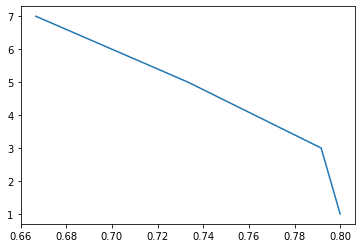

In [25]:
# @ alpha = 0.8
accuracy_alpha1 = []
for i in [1,3,5,7]:
  classifier = KNeighborsClassifier(n_neighbors=i)
  classifier.fit(P1_train, train7_label_array)
  y_pred = classifier.predict(P1_test)

  print("\n classifier:\n", classifier)
  print("\n prediction:\n", y_pred)
  print("\n prediction shape:\n", y_pred.shape)

  # Report Accuracy for every value of alpha separately
  accuracy_alpha1.append(accuracy_score(test3_label_array, y_pred))

print("\n accuracy for alpha = 0.8 is:\n",accuracy_alpha1)
  # accuracy_score(y_pred, test_label, normalize=False)

print("\n accuracy for PCA when 70/30 split graph is:\n")
plt.plot(accuracy_alpha1,[1,3,5,7])
plt.show()


 classifier:
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

 prediction:
 [ 3.  3.  8. 21.  2. 39.  3.  8.  3.  4.  4.  4.  5.  5.  5.  6.  6.  6.
  8.  8.  7.  8. 19.  8.  9.  9.  9. 10. 10. 10. 11.  7. 11. 12. 12. 12.
 13. 13. 13. 14. 14. 14. 15. 15. 15. 16. 16. 16. 17. 17. 17. 18. 18. 18.
 19. 19. 19.  4. 20. 20. 21. 30. 21. 13. 22. 22. 23. 32. 23. 24. 24. 24.
 25. 25. 25. 26. 26. 26. 27. 27. 27. 28. 28. 28. 29. 29. 29.  9. 30.  9.
 31. 31. 31. 32. 32. 32. 33. 33. 33. 39. 34. 34. 35. 35. 15. 36. 36. 36.
 37. 37. 37. 38. 38. 38. 39. 39. 39. 40. 40. 40.]

 prediction shape:
 (120,)

 classifier:
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

 prediction:
 [ 3.  3.  8. 21.  2. 35.  3. 29.  8.  4.  4.  4.  

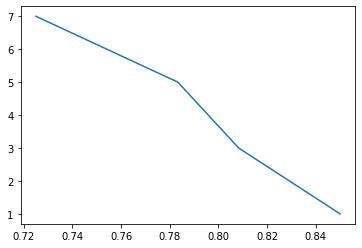

In [26]:
# @  alpha = 0.85
accuracy_alpha2 = []
for i in [1,3,5,7]:
  classifier = KNeighborsClassifier(n_neighbors=i)
  classifier.fit(P2_train, train7_label_array)
  y_pred = classifier.predict(P2_test)

  print("\n classifier:\n", classifier)
  print("\n prediction:\n", y_pred)
  print("\n prediction shape:\n", y_pred.shape)

  # Report Accuracy for every value of alpha separately
  accuracy_alpha2.append(accuracy_score(test3_label_array, y_pred))

print("\n accuracy for alpha = 0.85 is:\n",accuracy_alpha2)

print("\n accuracy for PCA when 70/30 split graph is:\n")
plt.plot(accuracy_alpha2,[1,3,5,7])
plt.show()


 classifier:
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

 prediction:
 [ 3.  3.  8.  2.  2. 39.  3.  8.  3.  4.  4.  4.  5.  5.  5.  6.  6.  6.
  8.  8.  7.  8. 19.  8.  9.  9.  9. 10. 10. 10. 11.  7. 11. 12. 12. 12.
 13. 13. 13. 14. 14. 14. 15. 15. 15. 16. 16. 16. 17. 17. 17. 18. 18. 18.
 19. 19. 19.  4. 20. 20. 21.  7. 21. 13. 22. 22. 23. 32. 23. 24. 24. 24.
 25. 25. 25. 26. 26. 26. 27. 27. 27. 28. 28. 28. 29. 29. 29.  9. 30.  9.
 31. 31. 31. 32. 32. 32. 33. 33. 33. 39. 34. 34. 35. 35. 35. 36. 36. 36.
 37. 37. 37. 38. 38. 38. 39. 39. 39. 40. 40. 40.]

 prediction shape:
 (120,)

 classifier:
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

 prediction:
 [ 3.  3.  1.  2.  2. 35.  3.  8.  3.  4.  4.  4.  

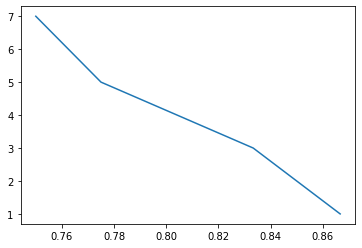

In [27]:
# @  alpha = 0.9
accuracy_alpha3 = []
for i in [1,3,5,7]:
  classifier = KNeighborsClassifier(n_neighbors=i)
  classifier.fit(P3_train, train7_label_array)
  y_pred = classifier.predict(P3_test)

  print("\n classifier:\n", classifier)
  print("\n prediction:\n", y_pred)
  print("\n prediction shape:\n", y_pred.shape)

  # Report Accuracy for every value of alpha separately
  accuracy_alpha3.append(accuracy_score(test3_label_array, y_pred))

print("\n accuracy for alpha = 0.9 is:\n",accuracy_alpha3)

print("\n accuracy for PCA when 70/30 split graph is:\n")
plt.plot(accuracy_alpha3,[1,3,5,7])
plt.show()


 classifier:
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

 prediction:
 [ 3.  3.  1.  2.  2. 39.  3.  8.  3.  4.  4.  4.  5.  5.  5.  6.  6.  6.
  8.  8.  7.  8. 19.  8.  9.  9.  9. 10. 10. 10. 11.  7. 11. 12. 12. 12.
 13. 13. 13. 14. 14. 14. 15. 15. 15. 16. 16. 16. 17. 17. 17. 18. 18. 18.
 19. 19. 19.  4. 20. 20. 21.  7. 21. 13. 22. 22. 23. 32. 23. 24. 24. 24.
 25. 25. 25. 26. 26. 26. 27. 27. 27. 28. 28. 28. 29. 29. 29.  9. 30.  9.
 31. 31. 31. 32. 32. 32. 33. 33. 33. 39. 34. 34. 35. 35. 35. 36. 36. 36.
 16. 16. 37. 38. 38. 38. 39. 39. 39. 40. 40. 40.]

 prediction shape:
 (120,)

 classifier:
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

 prediction:
 [ 3.  3.  1.  2.  2. 35.  3.  8.  3.  4.  4.  4.  

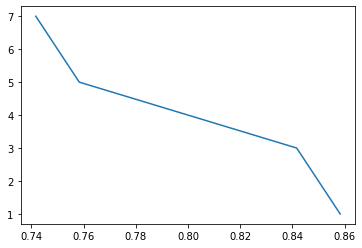

In [28]:
# @  alpha = 0.95
accuracy_alpha4 = []
for i in [1,3,5,7]:
  classifier = KNeighborsClassifier(n_neighbors=i)
  classifier.fit(P4_train, train7_label_array)
  y_pred = classifier.predict(P4_test)

  print("\n classifier:\n", classifier)
  print("\n prediction:\n", y_pred)
  print("\n prediction shape:\n", y_pred.shape)

  # Report Accuracy for every value of alpha separately
  accuracy_alpha4.append(accuracy_score(test3_label_array, y_pred))

print("\n accuracy for alpha = 0.95 is:\n",accuracy_alpha4)

print("\n accuracy for PCA when 70/30 split graph is:\n")
plt.plot(accuracy_alpha4,[1,3,5,7])
plt.show()

# **5. Classification using LDA.**

In [ ]:
def LDA(D,Dtest):
  X = []
  M = []
  for i in range(40):
      subarray = []
      for j in range(5):
          subarray.append(D[i*5+j])
      M.append(np.mean(subarray,axis = 0))
      X.append(subarray)
  X = np.asarray(X)  # (40, 5, 10304)
  M = np.mean(X,axis = 1)  # (40, 10304)
  overall_M = np.mean(M,axis = 0)  # 10304
  S = np.zeros([10304,10304])
  S_b = np.zeros([10304,10304])
  for i in range (40):
    Zi = X[i]-M[i]
    S_b += 5*np.dot((M-overall_M).T,(M-overall_M))
    S += np.dot(Zi.T,Zi)
  # print(S_b.shape)
  product = np.matmul(np.linalg.pinv(S),S_b) # S inv
  vals,vecs = np.linalg.eigh(product)
  idx = vals.argsort()[::-1]
  vals = vals[idx]
  vecs = vecs[:,idx]
  Train_LDA = np.dot(D , vecs)
  Test_LDA = np.dot(Dtest , vecs)
  return Train_LDA,Test_LDA

In [ ]:
Train_LDA,Test_LDA = LDA(train_set_array,test_set_array)


 classifier:
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

 prediction:
 [ 1.  3.  1.  1.  1. 12. 39.  2.  2.  2.  3.  3.  1.  3.  3.  4.  4.  4.
  4.  4.  5.  5.  5.  5.  5.  6.  6.  6.  6.  6.  7.  7.  7.  7.  7.  8.
  8.  8.  8.  8.  1.  9.  9.  1.  1. 10. 10. 10. 10. 10. 11. 11. 11. 11.
 11. 12. 12. 12. 14.  2. 13. 13. 13. 13. 13. 14. 14. 14. 14. 14. 15. 15.
 15. 15. 15. 16. 16. 16. 16. 16. 17. 17. 17. 17. 17. 18. 18. 18. 18. 18.
 19. 19. 19. 19. 19. 40. 20. 20. 20. 20. 21. 21. 21.  6. 21. 13. 22. 22.
 22. 22. 23. 23. 23. 23. 31. 24. 24. 24. 24. 24. 25. 25. 25. 25. 25. 26.
 26. 26. 26. 26. 27. 27. 17. 30. 27. 28. 28. 28. 28. 28. 29. 40. 40. 40.
  5.  9.  9. 30. 30. 30. 31. 31. 31. 31. 31. 32. 32. 31. 32. 32. 33. 33.
 33. 33. 33. 34. 34. 34. 34. 34. 35. 35. 35. 35. 35. 36. 36. 36. 36. 36.
 37. 37. 37. 37. 16. 38. 38. 38. 38. 38. 39. 39. 39. 

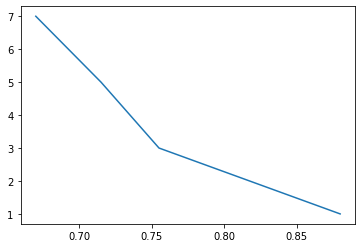

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
accuracy_LDA = []
for i in [1,3,5,7]:
  classifier = KNeighborsClassifier(n_neighbors=i)
  classifier.fit(Train_LDA, train_label_array)
  y_pred = classifier.predict(Test_LDA)

  print("\n classifier:\n", classifier)
  print("\n prediction:\n", y_pred)
  print("\n prediction shape:\n", y_pred.shape)

  # Report Accuracy for every value of alpha separately
  accuracy_LDA.append(accuracy_score(test_label_array, y_pred))

print("\n accuracy for LDA when 50/50 split is:\n",accuracy_LDA)
plt.plot(accuracy_LDA,[1,3,5,7])
plt.show()

In [ ]:
Train7_LDA,Test3_LDA = LDA(train7_set_array,test3_set_array)


 classifier:
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

 prediction:
 [ 3.  3. 11. 12.  2. 39.  3.  8.  3.  4.  4.  4.  5.  5.  5.  6.  6.  6.
  8.  8.  7.  8. 19.  8.  9.  9.  9. 10. 10. 10. 11.  7. 11. 12. 12. 12.
 13. 13. 13. 14. 14. 14. 15. 15. 15. 16. 16. 16. 17. 17. 17. 18. 18. 18.
 19. 19. 19.  4. 20. 20. 21.  7. 21. 13. 22. 22. 23. 32. 23. 24. 24. 24.
 25. 25. 25. 26. 26. 26. 27. 27. 27. 28. 28. 28. 29. 29. 29.  9. 30.  9.
 31. 31. 31. 32. 32. 32. 33. 33. 33. 39. 34. 34. 35. 35. 35. 36. 36. 36.
 16. 16. 37. 38. 38. 38. 39. 39. 39. 40. 40. 40.]

 prediction shape:
 (120,)

 classifier:
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

 prediction:
 [ 3.  3.  1.  2.  2. 35.  3.  8.  3.  4.  4.  4.  

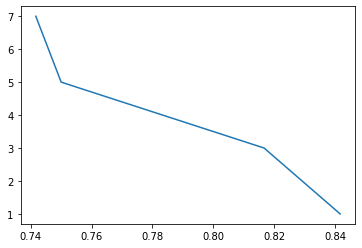

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
accuracy_LDA2 = []
for i in [1,3,5,7]:
  classifier = KNeighborsClassifier(n_neighbors=i)
  classifier.fit(Train7_LDA, train7_label_array)
  y_pred = classifier.predict(Test3_LDA)

  print("\n classifier:\n", classifier)
  print("\n prediction:\n", y_pred)
  print("\n prediction shape:\n", y_pred.shape)

  # Report Accuracy for every value of alpha separately
  accuracy_LDA2.append(accuracy_score(test3_label_array, y_pred))

print("\n accuracy for LDA when 50/50 split is:\n",accuracy_LDA2)
plt.plot(accuracy_LDA2,[1,3,5,7])
plt.show()